In [5]:
import numpy as np
import matplotlib.pyplot as plt

dcgan = np.load("DCGAN.npz")
dcgan = np.moveaxis(dcgan, 1,2)
dcgan = np.moveaxis(dcgan, 2,3)

dragan = np.load("DRAGAN.npz")
dragan = np.moveaxis(dragan, 1,2)
dragan = np.moveaxis(dragan, 2,3)

lsgan = np.load("LSGAN.npz")
lsgan = np.moveaxis(lsgan, 1,2)
lsgan = np.moveaxis(lsgan, 2,3)

wgan = np.load("WGAN.npz")
wgan = np.moveaxis(wgan, 1,2)
wgan = np.moveaxis(wgan, 2,3)

print("LOAD")

LOAD


In [ ]:
import radialProfile
import glob
import cv2
from scipy.interpolate import griddata

## real data
N = 88
epsilon = 1e-8
number_iter = 1000
psd1D_total = np.zeros([number_iter, N])
y = []
error = []



def RGB2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# real
psd1D_org_mean = np.zeros(N)
psd1D_org_std = np.zeros(N)

cont = 0
rootdir = '/DATASETS/resized_celebA_128/celebA/'

#-----------------
# ----Original------
#-----------------
for filename in glob.glob(rootdir+"*.jpg"):     
    img = cv2.imread(filename,0)

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
    
     # Calculate the azimuthally averaged 1D power spectrum
    points = np.linspace(0,N,num=psd1D.size) # coordinates of a
    xi = np.linspace(0,N,num=N) # coordinates for interpolation
    interpolated = griddata(points,psd1D,xi,method='cubic')
    
    interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
    psd1D_total[cont,:] = interpolated  
    
    cont+=1
    
    if cont == number_iter:
        break


for x in range(N):
    psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std[x] = np.std(psd1D_total[:,x])

#-----------------
# ----dcgan-------
#-----------------
psd1D_org_mean2= np.zeros(N)
psd1D_org_std2= np.zeros(N)
cont = 0


for i in range(dcgan.shape[0]): 
      
    img = RGB2gray(dcgan[i])
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
    psd1D = (psd1D-np.min(psd1D))/(np.max(psd1D)-np.min(psd1D))
    psd1D_total[cont,:] = psd1D             

    cont+=1
    
    if cont == number_iter:
        break


for x in range(N):
    psd1D_org_mean2[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std2[x]= np.std(psd1D_total[:,x])
    
#-----------------
# ----dragan------
#-----------------
psd1D_org_mean3= np.zeros(N)
psd1D_org_std3= np.zeros(N)
cont = 0


for i in range(dragan.shape[0]): 
      
    img = RGB2gray(dragan[i])
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
    psd1D = (psd1D-np.min(psd1D))/(np.max(psd1D)-np.min(psd1D))
    psd1D_total[cont,:] = psd1D             

    cont+=1
    
    if cont == number_iter:
        break


for x in range(N):
    psd1D_org_mean3[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std3[x]= np.std(psd1D_total[:,x])
    

#-----------------
# ----lsgan------
#-----------------
psd1D_org_mean4= np.zeros(N)
psd1D_org_std4= np.zeros(N)
cont = 0


for i in range(lsgan.shape[0]): 
      
    img = RGB2gray(lsgan[i])
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
    psd1D = (psd1D-np.min(psd1D))/(np.max(psd1D)-np.min(psd1D))
    psd1D_total[cont,:] = psd1D             

    cont+=1
    
    if cont == number_iter:
        break
        
for x in range(N):
    psd1D_org_mean4[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std4[x]= np.std(psd1D_total[:,x])    

    
#-----------------
# ----wgan-gp-----
#-----------------
psd1D_org_mean5= np.zeros(N)
psd1D_org_std5= np.zeros(N)
cont = 0


for i in range(wgan.shape[0]): 
      
    img = RGB2gray(wgan[i])
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
    psd1D = (psd1D-np.min(psd1D))/(np.max(psd1D)-np.min(psd1D))
    psd1D_total[cont,:] = psd1D             

    cont+=1
    
    if cont == number_iter:
        break

for x in range(N):
    psd1D_org_mean5[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std5[x]= np.std(psd1D_total[:,x])    

    
y.append(psd1D_org_mean)
y.append(psd1D_org_mean2)
y.append(psd1D_org_mean3)
y.append(psd1D_org_mean4)
y.append(psd1D_org_mean5)

error.append(psd1D_org_std)
error.append(psd1D_org_std2)
error.append(psd1D_org_std3)
error.append(psd1D_org_std4)
error.append(psd1D_org_std5)

print("DONE")

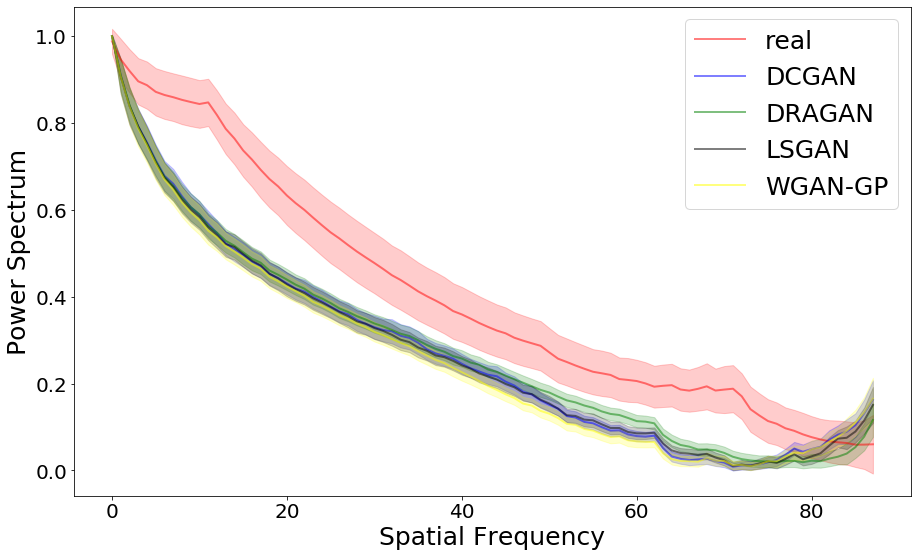

In [7]:
x = np.arange(0, N, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, y[0], alpha=0.5, color='red', label='real', linewidth =2.0)
ax.fill_between(x, y[0] - error[0], y[0] + error[0], color='red', alpha=0.2)

ax.plot(x, y[1], alpha=0.5, color='blue', label='DCGAN', linewidth = 2.0)
ax.fill_between(x, y[1] - error[1], y[1] + error[1], color='blue', alpha=0.2)

ax.plot(x, y[2], alpha=0.5, color='green', label='DRAGAN', linewidth = 2.0)
ax.fill_between(x, y[2] - error[2], y[2] + error[2], color='green', alpha=0.2)

ax.plot(x, y[3], alpha=0.5, color='black', label='LSGAN', linewidth = 2.0)
ax.fill_between(x, y[3] - error[3], y[3] + error[3], color='black', alpha=0.2)

ax.plot(x, y[4], alpha=0.5, color='yellow', label='WGAN-GP', linewidth = 2.0)
ax.fill_between(x, y[4] - error[4], y[4] + error[4], color='yellow', alpha=0.2)


plt.xlabel('Spatial Frequency', fontsize=25)
plt.ylabel('Power Spectrum', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax.legend(loc='best', prop={'size': 25})